<h1>Group 5</h1>

<h3>HW 4</h3>

<h3>Grayson Felt, Hayden Clegg, Beau Denhalter, Mitchell Green, Tommy Martineau</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os as os

<h2>Part 1 - Linear Regression </h2>

In [2]:
df = pd.read_csv('nyc-rolling-sales_clean.csv')

In [3]:
rand_state = 1000

In [4]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,sale_year,sale_month
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,2016,9
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,2016,9
2,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,S3,10009,3,1,4,1520.0,3360.0,1910,2,S3,3300000.0,2016-11-15,2016,11
3,Manhattan,ALPHABET CITY,22 STORE BUILDINGS,4,K4,10009,0,1,1,1218.0,3586.0,1899,4,K4,3700000.0,2016-09-28,2016,9
4,Manhattan,CHELSEA,07 RENTALS - WALKUP APARTMENTS,2B,C4,10011,9,0,9,1566.0,6330.0,1901,2,C4,1583840.0,2017-08-31,2017,8


1. Change the type of the feature variables as you see fit! You can use my answer key for HW2 as a reference

In [5]:
categoricals = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 
                'ZIP CODE', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
                'BUILDING CLASS AT PRESENT']
for col in categoricals:
    df[col] = df[col].astype('category')

In [6]:
float64s = ['SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']

for col in float64s:
    df[col]=pd.to_numeric(df[col], errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30236 entries, 0 to 30235
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         30236 non-null  category
 1   NEIGHBORHOOD                    30236 non-null  category
 2   BUILDING CLASS CATEGORY         30236 non-null  category
 3   TAX CLASS AT PRESENT            30236 non-null  category
 4   BUILDING CLASS AT PRESENT       30236 non-null  category
 5   ZIP CODE                        30236 non-null  category
 6   RESIDENTIAL UNITS               30236 non-null  int64   
 7   COMMERCIAL UNITS                30236 non-null  int64   
 8   TOTAL UNITS                     30236 non-null  int64   
 9   LAND SQUARE FEET                30236 non-null  float64 
 10  GROSS SQUARE FEET               30236 non-null  float64 
 11  YEAR BUILT                      30236 non-null  category
 12  TAX CLASS AT TIME 

2. Define your target variable as target= log(SALE PRICE) and add it to your data frame. Explain why this transformation would boost the performance of your linear model?

In [8]:
df['target'] = np.log(df['SALE PRICE'])

This transformation normalizes our target variable which improves a linear fit.

3. Define your feature space (X). You can pick as many features as possible! it's your call!

In [9]:
y = df['target']
X = df.drop(['target', 'SALE PRICE', 'TOTAL UNITS', 'SALE DATE'], axis = 1)

4. Use get_dummies( drop_first=True ) function from pandas package to make the categorical variables into dummy variables. How many features you have now? wow! welcome to Machine Learning

In [10]:
X = pd.get_dummies(X, drop_first = True)

5. Split the data into test (30%) and train set (70%)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)

6. Use LinearRegression() model from Sklearn package to train the model.

In [12]:
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

    6.1 Save the predicted values for the test set in y_hat_test.

In [13]:
y_hat_test = reg_model.predict(X_test)

    6.2 Construct a data frame named log_predictions which has 3 columns. y_test, y_hat_test , resid.

In [14]:
log_predictions = pd.DataFrame({'actuals':y_test, 'predictions':y_hat_test, 'resid': y_test - y_hat_test})
log_predictions.head()

,actuals,predictions,resid
3767,14.077875,13.663968,0.413907
24270,13.199324,13.128378,0.070947
27718,13.384728,13.223621,0.161106
6232,12.873902,13.135011,-0.261109
11161,13.710150,13.874091,-0.163941


    6.3 Report the RMSE_test (RMSE in the test set)

In [15]:
MSE_test = np.mean(np.square(log_predictions['resid']))
np.round(MSE_test,3)
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.53

7. Estimate the RMSE_test using K-Fold Cross Validation technique (try K=5 and K=10) and name them as RMSE_CV5 and RMSE_CV10.

In [16]:
my_estimator = LinearRegression()

5 Fold Cross Validation:

In [17]:
from sklearn.model_selection import cross_val_score

NMSE_1 = cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=5, scoring="neg_mean_squared_error")

In [18]:
MSE_1= -NMSE_1
MSE_1

array([0.33819998, 0.90414981, 1.65561816, 0.29678619, 0.86521231])

In [19]:
MSE_CV5 = np.mean(MSE_1)
np.round(MSE_CV5,3)
RMSE_1 = np.sqrt(MSE_1)
RMSE_1

array([0.58154964, 0.95086793, 1.28670827, 0.54478086, 0.93016789])

In [20]:
RMSE_CV5 = np.mean(RMSE_1)
np.round(RMSE_CV5,3)

0.859

10 Fold Cross Validation:

In [21]:
my_estimator2 = LinearRegression()

In [22]:
NMSE_2 = cross_val_score(estimator=my_estimator2, X=X_train, y=y_train, cv=10, scoring="neg_mean_squared_error")
MSE_2= -NMSE_2
MSE_2

array([0.32453562, 0.33259887, 0.27347886, 1.3444562 , 0.29323169,
       3.64742623, 0.27345999, 0.31398736, 0.25728183, 1.54715443])

In [23]:
MSE_CV10 = np.mean(MSE_2)
np.round(MSE_CV10,3)

0.861

In [24]:
RMSE_2 = np.sqrt(MSE_2)
RMSE_2

array([0.56968028, 0.57671386, 0.52295206, 1.15950688, 0.54150871,
       1.90982361, 0.52293402, 0.56034575, 0.50722957, 1.24384663])

In [25]:
RMSE_CV10 = np.mean(RMSE_2)
np.round(RMSE_CV10,3)

0.811

Compare RMSE_CV with RMSE_test from part 3 and explain your observation?

Our RMSE_CV10 is .811, compared to the RMSE_test, which is .53. Upon cross validating with a 10 fold technique, we see that the RMSE is somewhat higher.

<h2> Part 2 - Polynomial Regression </h2>

In this exercise you should work with "SALE PRICE" as your target variable and "LAND SQUARE FEET" as the only feature which you want to make it polynomial.  I specifically want you to do the followings:

In [26]:
df_poly = pd.read_csv('boston_polynomial.csv')

1. Define x= np.array(df_poly['LSTAT']) and  y= np.array(df_poly['price']). Draw a scatter plot for price vs LSTAT using x and y

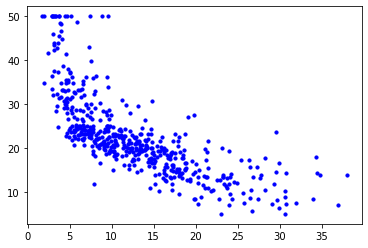

In [27]:
x= np.array(df_poly['LSTAT'])
y= np.array(df_poly['price'])

plt.scatter(x, y, s=10, c='b')

2. Import PolynomialFeatures class from sklearn.preprocessing. Now fit_transform your x and call it X_poly. Set polynomial degree = 5.

In [28]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5)
X_poly = pd.DataFrame(poly.fit_transform(x.reshape(-1,1)))

3. Split the data into test (30%) and train set (70%)

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=100)

4. Use LinearRegression() model from Sklearn package to train the model and report the RMSE_test (RMSE of the test set) of your polynomial model. 

In [30]:
from sklearn.linear_model import LinearRegression

#Use LinearRegression() model from Sklearn package to train the model
poly_model = LinearRegression()
poly_model.fit(x_train, y_train)

# Save the predicted values for the test set in y_hat_test
y_hat_test = poly_model.predict(x_test)

#Construct a data frame named predictions which has 3 columns. y_test, y_hat_test , resid
predictions = pd.DataFrame({'y_test': y_test, 'y_hat_test': y_hat_test})
predictions['resid'] = predictions['y_test']-predictions['y_hat_test']

#Report the RMSE_test (RMSE in the test set)
RMSE_test = round(np.sqrt(np.mean(np.square(predictions['resid']))),2)
print("RMSE test: ", RMSE_test)

RMSE test:  6.15


5. Estimate the RMSE_test using K-Fold Cross Validation technique (K=5 only) and name it as RMSE_CV5.

In [31]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

poly_model = LinearRegression()
poly_model.fit(x_train, y_train)

NMSE = cross_val_score(estimator = poly_model, X = x_train, y = y_train, cv = 5, scoring="neg_mean_squared_error")

RMSE_CV5 = np.sqrt(-NMSE).mean()
print("Estimated RMSE using cross validation: ", RMSE_CV5)

Estimated RMSE using cross validation:  4.770598838634827


In [32]:
def my_polynomial_regression(poly_degree, X, y, test_size=0.3, rand_state=100):
    
    poly_features= PolynomialFeatures(degree=poly_degree)
    
    # transforms the existing features to higher degree features.
    X_poly = pd.DataFrame(poly_features.fit_transform(X.reshape(-1,1)))   
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=test_size, random_state=rand_state)

    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train, y_train)
    
  
    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train)
  
    # predicting on test data-set
    y_test_predicted = poly_model.predict(X_test)
  
   # evaluating the model on training dataset
    MSE_train = round(np.mean(np.square(y_train - y_train_predicted)),2)
    RMSE_train = round(np.sqrt(MSE_train),2)

  
    # evaluating the model on test dataset
    MSE_test = round(np.mean(np.square(y_test - y_test_predicted)),2)
    RMSE_test = round(np.sqrt(MSE_test),2)
    
    return poly_degree, RMSE_train, RMSE_test

In [33]:
poly_table = pd.DataFrame([my_polynomial_regression(i,x,y) for i in range(1,11)], columns=['Degree', 'RMSE_train', 'RMSE_test'])
poly_table

,Degree,RMSE_train,RMSE_test
0,1,5.92,6.88
1,2,5.13,6.32
2,3,4.95,6.26
3,4,4.82,6.16
4,5,4.72,6.15
5,6,4.70,6.17
6,7,4.69,6.17
7,8,4.69,6.16
8,9,4.69,6.15
9,10,4.69,6.15


<AxesSubplot:xlabel='Degree'>

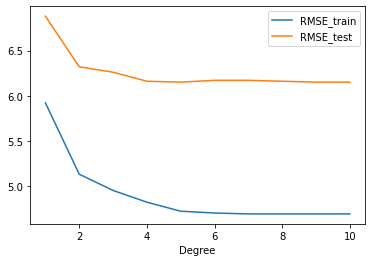

In [34]:
poly_table.set_index('Degree').plot()

Using the elbow method, degree 10 would be our best fitting model since RMSE_test is minimized. 